In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install -U plotly


In [3]:
!pip install -U kaleido

In [4]:

import kaleido
kaleido.get_chrome_sync()

PosixPath('/usr/local/lib/python3.11/dist-packages/choreographer/cli/browser_exe/chrome-linux64/chrome')

##Extracción del Archivo Tratado

In [8]:

df_model = pd.read_csv('/content/df_modelado.csv')

df_model.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account_daily_charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [9]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [10]:
df_model.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,account_daily_charges
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [12]:
# Eliminar columnas innecesarias

df_clean = df_model.drop(columns=['customerID', 'account_daily_charges'])

In [14]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer.gender            7043 non-null   object 
 2   customer.SeniorCitizen     7043 non-null   int64  
 3   customer.Partner           7043 non-null   object 
 4   customer.Dependents        7043 non-null   object 
 5   customer.tenure            7043 non-null   int64  
 6   phone.PhoneService         7043 non-null   object 
 7   phone.MultipleLines        7043 non-null   object 
 8   internet.InternetService   7043 non-null   object 
 9   internet.OnlineSecurity    7043 non-null   object 
 10  internet.OnlineBackup      7043 non-null   object 
 11  internet.DeviceProtection  7043 non-null   object 
 12  internet.TechSupport       7043 non-null   object 
 13  internet.StreamingTV       7043 non-null   objec

In [15]:
# eliminando valores nulos en Charges.Totl
df_clean = df_clean.dropna(subset=['account.Charges.Total'])

In [16]:
# Seleccionar Columnas Tipo Object
columnas_categoricas = df_clean.select_dtypes(include=['object']).columns
columnas_categoricas

Index(['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'],
      dtype='object')

In [17]:
# Realizando el One-Hot Encoding
df_final = pd.get_dummies(df_clean, columns=columnas_categoricas,drop_first=True)


In [18]:
df_final.head()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.6,593.30,False,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,True,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,True,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,True,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


In [22]:
df_final.shape

(7032, 31)

In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7032 non-null   int64  
 1   customer.tenure                                7032 non-null   int64  
 2   account.Charges.Monthly                        7032 non-null   float64
 3   account.Charges.Total                          7032 non-null   float64
 4   Churn_Yes                                      7032 non-null   bool   
 5   customer.gender_Male                           7032 non-null   bool   
 6   customer.Partner_Yes                           7032 non-null   bool   
 7   customer.Dependents_Yes                        7032 non-null   bool   
 8   phone.PhoneService_Yes                         7032 non-null   bool   
 9   phone.MultipleLines_No phone service           7032 non-n

In [25]:
# calculo de proporcion clientes Churn
# se asume que Churn_Yes es one-hot encoded de la columna para'Yes'

proporcion_churn = df_final['Churn_Yes'].value_counts(normalize=True)
print(proporcion_churn)

Churn_Yes
False    0.734215
True     0.265785
Name: proportion, dtype: float64


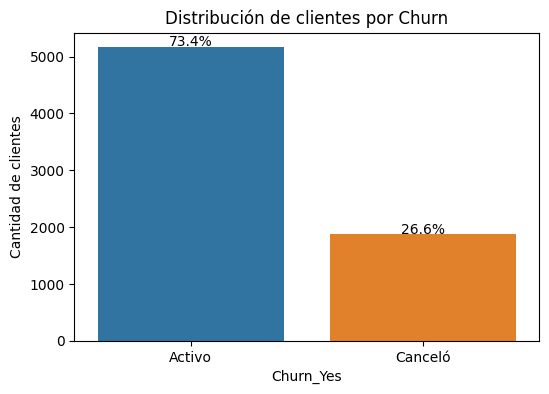

In [95]:
import os

# Create the directory if it doesn't exist
if not os.path.exists('/content/Graficos'):
    os.makedirs('/content/Graficos')

plt.figure(figsize=(6,4))
ax = sns.countplot(x='Churn_Yes', data=df_final, palette=['#1f77b4','#ff7f0e'])
plt.xticks([0,1], ['Activo', 'Canceló'])
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de clientes por Churn')

total = len(df_final['Churn_Yes'])
for p in ax.patches:
    height = p.get_height()
    proportion = height / total * 100
    ax.text(
        p.get_x() + p.get_width()/2.,
        height + 20,  # posición un poco arriba de la barra
        f'{proportion:.1f}%',
        ha="center"
    )

plt.savefig('/content/Graficos/Distribucion_Clientes_Churn.png',bbox_inches='tight')
plt.show()

![Título del gráfico](graficos/Distribucion_Clientes_Churn.png)

En proyectos de churn, la normalización o estandarización de variables numéricas es necesaria solo para modelos sensibles a la escala, como KNN, SVM, Regresión Logística o Redes Neuronales, ya que estos dependen de distancias o gradientes. Modelos basados en árboles, como Decision Tree, Random Forest o XGBoost, no requieren escalado, pues trabajan con particiones y reglas. Para un flujo práctico, se puede entrenar primero Random Forest sin escalado y, si se prueba Regresión Logística u otros modelos sensibles, estandarizar únicamente las columnas numéricas relevantes.

In [35]:
# Análisis de Correlación

columnas_numericas = df_final.select_dtypes(include=['int64','float']).columns
columnas_numericas

Index(['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly',
       'account.Charges.Total'],
      dtype='object')

In [42]:
colum_numer_final = ['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly',
       'account.Charges.Total','Churn_Yes']

In [43]:
# Matriz de correlación

matriz_corr = df_final[colum_numer_final].corr()
print(matriz_corr)

                         customer.SeniorCitizen  customer.tenure  \
customer.SeniorCitizen                 1.000000         0.015683   
customer.tenure                        0.015683         1.000000   
account.Charges.Monthly                0.219874         0.246862   
account.Charges.Total                  0.102411         0.825880   
Churn_Yes                              0.150541        -0.354049   

                         account.Charges.Monthly  account.Charges.Total  \
customer.SeniorCitizen                  0.219874               0.102411   
customer.tenure                         0.246862               0.825880   
account.Charges.Monthly                 1.000000               0.651065   
account.Charges.Total                   0.651065               1.000000   
Churn_Yes                               0.192858              -0.199484   

                         Churn_Yes  
customer.SeniorCitizen    0.150541  
customer.tenure          -0.354049  
account.Charges.Monthly   0.1

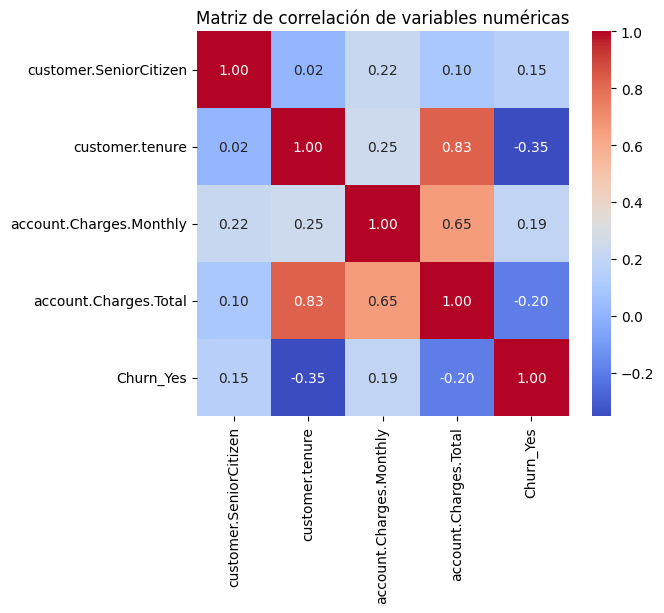

In [97]:
plt.figure(figsize=(6,5))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de correlación de variables numéricas")
plt.savefig('/content/Graficos/matriz_correlacion.png', bbox_inches='tight')
plt.show()

![Matriz de correlación](graficos/matriz_correlacion.png)

 Interpretación de la correlación con Churn_Yes

customer.tenure (-0.354) → correlación negativa moderada. Los clientes con más antigüedad tienen menos probabilidad de cancelar.

account.Charges.Monthly (0.193) → correlación positiva baja-moderada. Clientes con pagos mensuales más altos tienden a cancelar ligeramente más.

account.Charges.Total (-0.199) → correlación negativa baja. El gasto total acumulado muestra tendencia a permanecer en la compañía.

customer.SeniorCitizen (0.151) → correlación positiva baja. Ser cliente senior se asocia ligeramente con mayor churn.

####Conclusión: Las variables más relevantes para predecir 'CHURN' en nuestro df_final sorían (customer.tenure , account.Charges.Monthly y account.Charges.Total)

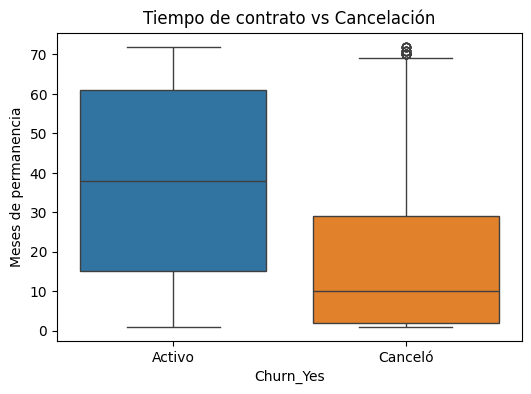

In [98]:
# Análisis customer.tenure  y churn

plt.figure(figsize=(6,4))
sns.boxplot(x='Churn_Yes', y='customer.tenure', data=df_final, palette=['#1f77b4','#ff7f0e'])
plt.xticks([0,1], ['Activo', 'Canceló'])
plt.ylabel('Meses de permanencia')
plt.title('Tiempo de contrato vs Cancelación')
plt.savefig('/content/Graficos/Tiempo_Contrato_Churn.png', bbox_inches='tight')

plt.show()


![Matriz de correlación](graficos/Tiempo_Contrato_Churn.png)

Los clientes que cancelan tienden a gastar menos ya que su tiempo de vigenica de contrato es mucho menor.

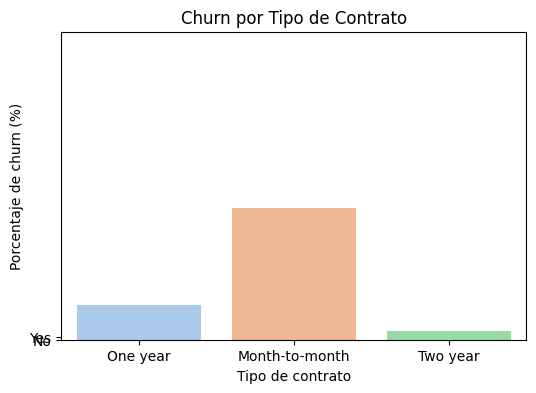

In [99]:
plt.figure(figsize=(6,4))
sns.barplot(x='account.Contract', y='Churn', data=df_clean, ci=None, estimator=lambda x: sum(x)/len(x)*100, palette='pastel')
plt.ylabel('Porcentaje de churn (%)')
plt.xlabel('Tipo de contrato')
plt.title('Churn por Tipo de Contrato')
plt.ylim(0, 100)
plt.savefig('/content/Graficos/Churn_tipo_contrato.png', bbox_inches='tight')
plt.show()

![Matriz de correlación](graficos/Churn_tipo_contrato.png)


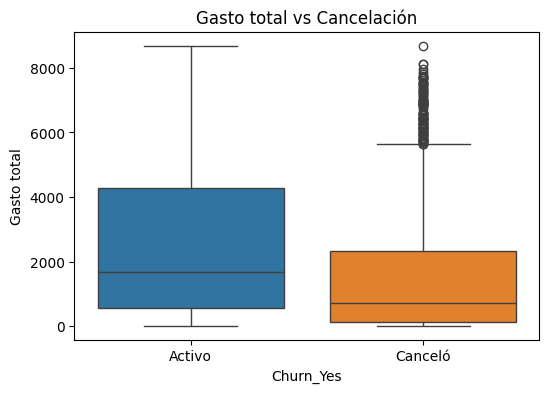

In [103]:
# análisis gastos totales vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn_Yes', y='account.Charges.Total', data=df_final, palette=['#1f77b4','#ff7f0e'])
plt.xticks([0,1], ['Activo', 'Canceló'])
plt.ylabel('Gasto total')
plt.title('Gasto total vs Cancelación')
plt.savefig('/content/Graficos/Gasto_total_churn.png', bbox_inches='tight')
plt.show()

![Matriz de correlación](graficos/Gasto_total_churn.png)

In [104]:
# Separación de Datos
# X -- Variables Caracterisiticas o Predictoras
# Y -- Variable Obejetivo o Target

X = df_final.drop(columns=['Churn_Yes'])
y = df_final['Churn_Yes']

# Separar en train (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño train:", X_train.shape)
print("Tamaño test:", X_test.shape)
print("Tamaño train:", y_train.shape)
print("Tamaño test:", y_test.shape)
print('\nDistribución de "Churn_Yes" en el conjunto de entrenamiento:')
print(y_train.value_counts(normalize=True))

Tamaño train: (4922, 30)
Tamaño test: (2110, 30)
Tamaño train: (4922,)
Tamaño test: (2110,)

Distribución de "Churn_Yes" en el conjunto de entrenamiento:
Churn_Yes
False    0.734254
True     0.265746
Name: proportion, dtype: float64


In [105]:
# Creación de Modelos

# Modelo : Random Forest
# ----------------------------
modelo_rf = RandomForestClassifier(n_estimators=100,max_depth=10, random_state=42,class_weight='balanced'
)

# Entrenar modelo
modelo_rf.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred_rf = modelo_rf.predict(X_test)

# Evaluación del modelo
print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_rf))

=== Random Forest ===
Accuracy: 0.7696682464454976
Matriz de confusión:
 [[1225  324]
 [ 162  399]]

Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.88      0.79      0.83      1549
        True       0.55      0.71      0.62       561

    accuracy                           0.77      2110
   macro avg       0.72      0.75      0.73      2110
weighted avg       0.80      0.77      0.78      2110



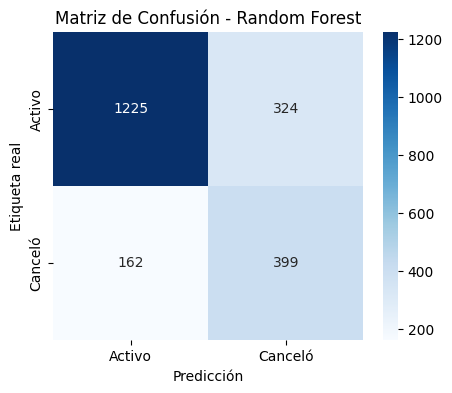

In [107]:
# Matriz de confusión
cm= confusion_matrix(y_test, y_pred_rf)
labels = ['Activo', 'Canceló']

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('Etiqueta real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión - Random Forest')
plt.savefig('/content/Graficos/Matriz_confusion_rf.png', bbox_inches='tight')
plt.show()

![Matriz de correlación](graficos/Matriz_confusion_rf.png)

Conclusión: En el análisis de churn se entrenó un modelo Random Forest para predecir clientes que cancelan. El modelo inicial presentó buena precisión para clientes activos (recall 0.91) pero detectaba pobremente los canceladores (recall 0.45). Para mejorar la identificación de churn, se ajustó la profundidad máxima de los árboles (max_depth=10), logrando aumentar significativamente el recall de clientes que cancelan a 0.71, aunque con una leve disminución de la precisión para activos y de la accuracy general (77%). Este ajuste permitió capturar más patrones de cancelación sin normalización de datos, priorizando la detección de clientes de riesgo. El cambio demuestra que controlar la complejidad del modelo mediante la profundidad de los árboles es efectivo para mejorar la capacidad de identificar churn, equilibrando la predicción de clientes activos y canceladores según los objetivos del proyecto.

In [108]:

# Modelo : Regresión Logística
# ----------------------------
# Copiamos los datos para normalizar solo las columnas numéricas
columnas_numericas= ['customer.SeniorCitizen', 'customer.tenure',
                'account.Charges.Monthly', 'account.Charges.Total']

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[columnas_numericas] = scaler.fit_transform(X_train[columnas_numericas])
X_test_scaled[columnas_numericas] = scaler.transform(X_test[columnas_numericas])

# Entrenar Regresión Logística
modelo_log= LogisticRegression(max_iter=1000, class_weight='balanced')
modelo_log.fit(X_train_scaled, y_train)

# Predicciones
y_pred_log = modelo_log.predict(X_test_scaled)

# Evaluación
print("=== Regresión Logística ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_log))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_log))

=== Regresión Logística ===
Accuracy: 0.737914691943128
Matriz de confusión:
 [[1111  438]
 [ 115  446]]

Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.91      0.72      0.80      1549
        True       0.50      0.80      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.75      2110



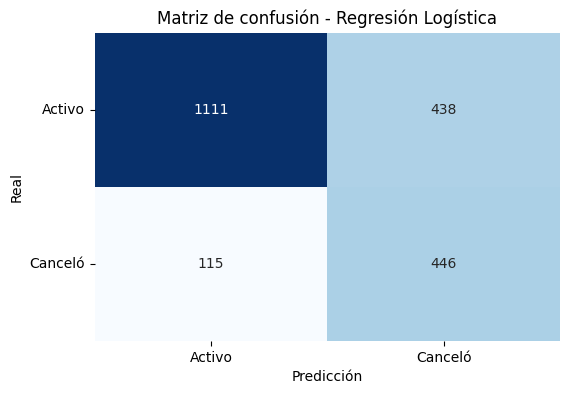

In [109]:
cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.xticks([0.5,1.5], ['Activo', 'Canceló'])
plt.yticks([0.5,1.5], ['Activo', 'Canceló'], rotation=0)
plt.title('Matriz de confusión - Regresión Logística')
plt.savefig('/content/Graficos/Matriz_confusion_rlog.png', bbox_inches='tight')
plt.show()

![Matriz de correlación](graficos/Matriz_confusion_rlog.png)


Conclusión: En el proyecto de predicción de churn se entrenaron dos modelos: Random Forest y Regresión Logística. El Random Forest inicial mostró buena precisión para clientes activos, pero bajo recall para canceladores (45%). Ajustando max_depth a 10 se logró aumentar el recall de churn a 71%, mejorando la detección de clientes que cancelan a costa de una leve disminución de accuracy (77%). La Regresión Logística, con normalización de variables numéricas, logró un recall aún mayor para churn (80%), asegurando que todas las variables contribuyan de manera equilibrada en la optimización de coeficientes y evitando sesgos por magnitudes distintas. Aunque generó más falsos positivos y menor accuracy global (73.8%), este enfoque es ideal para priorizar la identificación de clientes en riesgo de cancelar. La normalización asegura que los modelos basados en distancia o coeficientes no se vean afectados por la escala de las variables, mejorando la calidad de la predicción.

## Comparación y análisis de los modelos

###**Random Forest (max_depth=10)**

Exactitud (Accuracy): 77%

Precisión: Canceló 55%

Recall: Canceló 71%

F1-score:  Canceló 62%

Matriz de confusión:

Verdaderos Negativos (VN) 1225, clientes que no cancelaron  y fueron predichos correctamente.

Falsos Positivos (FP) 324, clientes que no cancelaron  pero fueron predichos incorrectamente como si lo hicieran.
  
Falsos Negativos (FN) 162, clientes que cancelaron pero fueron predichos incorrectamente como si no lo hicieran.

Verdaderos Positivos (VP) 399, clientes que si cancelaron y fueron correctamente predichos.


###**Regresión Logística (con normalización)**

Exactitud (Accuracy): 73.8%

Precisión: Canceló 50%

Recall: Canceló 80%

F1-score: Canceló 62%

Matriz de confusión:

Verdaderos Negativos (VN) 1111,clientes que no cancelaron  y fueron predichos correctamente.

Falsos Positivos (FP) 438,clientes que no cancelaron  pero fueron predichos incorrectamente como si lo hicieran.

Falsos Negativos (FN) 115,clientes que cancelaron pero fueron predichos incorrectamente como si no lo hicieran.

Verdaderos Positivos (VP) 446,clientes que si cancelaron y fueron correctamente predichos.


###**Conclusión:**

Nuestro Modelo de Random Forest es más preciso para clientes activos y posee mayor exactitud general, pero detecta menos clientes que cancelan (recall 71%).
EL modelo de Regresión Logístico demostró ser mejor para detectar Churn (recall 80%), es decir que identifica más clientes que cancelan aunque genera más falsos positivos y menor exactitud general, como nuestro objetivo en este análisis de los datos es prevenir Churn en la compañia el Modelo de Regresión es mas efectivo.


###Análisis de la Importancia de las Variables

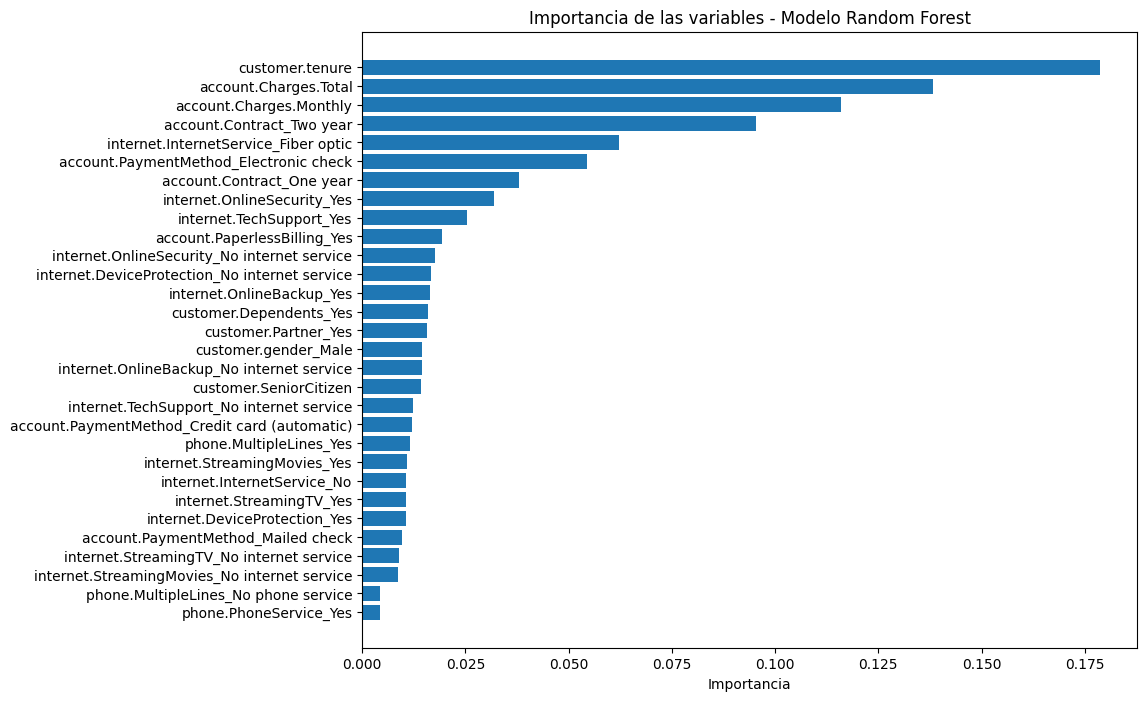

In [110]:
# Modelo Random Forest

# Graficar importancia de variables directamente

importances = pd.Series(modelo_rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importances.index, importances.values, color='#1f77b4')
plt.xlabel('Importancia')
plt.title('Importancia de las variables - Modelo Random Forest')
plt.gca().invert_yaxis()
plt.savefig('/content/Graficos/import_variable_rf.png', bbox_inches='tight')
plt.show()

![Matriz de correlación](graficos/import_variable_rfpng)


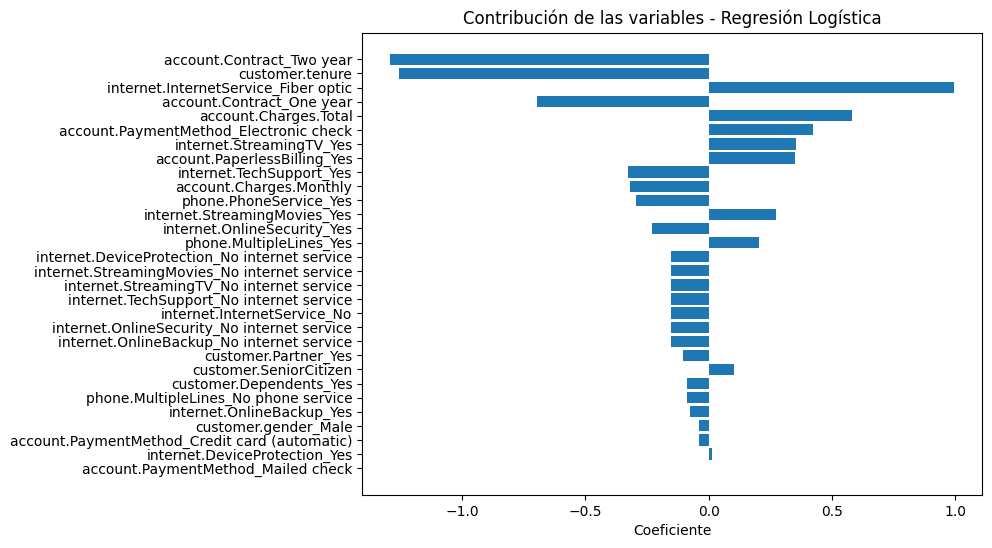

In [112]:
# Coeficientes Modelo de Regresión Logística

coeficientes = modelo_log.coef_[0]
variables = X_train.columns

#  DataFrame (valor absoluto)
df_coef= pd.DataFrame({'Variable': variables, 'Coeficiente': coeficientes})
df_coef['Impacto'] = np.abs(df_coef['Coeficiente'])
df_coef = df_coef.sort_values(by='Impacto', ascending=False)


plt.figure(figsize=(8,6))
plt.barh(df_coef['Variable'], df_coef['Coeficiente'], color='#1f77b4')
plt.xlabel('Coeficiente')
plt.title('Contribución de las variables - Regresión Logística')
plt.gca().invert_yaxis()
plt.savefig('/content/Graficos/contribucion_variables_rlog.png', bbox_inches='tight')
plt.show()

![Matriz de correlación](graficos/contribucion_variables_rlog.png)

##**Conclusión Final**

Informe de Análisis de Churn – Compañía Telefónica TELECOM X
Contexto:

La base de datos utilizada se obtuvo de un trabajo previo de limpieza de datos en un proyecto inicial. Contiene información de 7043 clientes con variables demográficas, de servicios y de facturación. El objetivo fue predecir la cancelación de clientes (churn) y analizar los factores que influyen en esta decisión.

Modelos utilizados:

Se entrenaron dos modelos:

Random Forest (sin normalización, ajustando max_depth=10).
Regresión Logística (con normalización de variables numéricas).

Rendimiento de los modelos:

Random Forest: Accuracy 77%, recall para churn 71%. Detecta bien clientes activos, pero algunos clientes que cancelan no fueron identificados.
Regresión Logística: Accuracy 73.8%, recall para churn 80%. Mejor para identificar clientes que cancelan, aunque genera más falsos positivos.
Variables más relevantes:

Random Forest: account.Charges.Total, customer.tenure, tipo de contrato y servicios contratados como Streaming TV o Online Security.

Regresión Logística: coeficientes positivos indican que menor tiempo de contrato (month-to-month), cargos totales más bajos y falta de servicios adicionales aumentan la probabilidad de churn.

Análisis e interpretación:

Clientes con contratos corto plazo y menores gastos totales tienen mayor riesgo de cancelación.
La ausencia de servicios adicionales, como seguridad en línea o streaming, también se relaciona con mayor churn.

Estrategias de retención:

Incentivar contratos anuales o bianuales ofreciendo descuentos o beneficios.
Promocionar paquetes de servicios adicionales para aumentar el valor percibido por el cliente.

Identificar clientes en riesgo usando los modelos y generar campañas de fidelización personalizadas.

Conclusión:

Aunque ambos modelos tienen ventajas, la Regresión Logística permite priorizar la detección de clientes que cancelan, mientras que Random Forest ofrece estabilidad general. Los factores más influyentes identificados permiten diseñar estrategias concretas de retención y mejorar la gestión de clientes.


In [115]:
from google.colab import files
import shutil

# Comprimir carpeta a ZIP

shutil.make_archive('Graficos', 'zip', '/content/Graficos')

# Descargar

files.download('Graficos.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>